[Fiddler 2025-12-05](https://thefiddler.substack.com/p/can-you-fling-the-fractal-darts)
====================
This puzzle was my suggestion.

In my formulation, the dartboard has a radius of $1/\sqrt\pi$ rather than 1, so my solutions
give results that are smaller by a factor of $\pi$.

Including the factor of $\pi$, the maximum score is $5\pi/3$, and the average score is
approximately 3.710.

My solution for the maximum score
---------------------------------
The center of the dartboard would score 1 for being in the outermost circle, 2/4 for being
on the perimeter of the two largest sub-gaskets, 2/16 for being on the perimeter of two of
the largest sub-sub-gaskets, etc, $1 + 2/4 + 2/16 + 2/64 + 2/256 + \cdots = 5/3$.

Ignoring the outermost circle, a point can be in the interior of a maximum of one circle at
each level, and can be on the perimeter of a maximum of two circles at each level, and the
center is on the perimeter of the two largest circles at each level, so the center scores
the maximum score.

My solution for the average score
---------------------------------
Let $S$ be the average score.  Let $k$ enumerate all the circles of a gasket except
the outermost.  Let $A_k$ be the area of circle $k$, where $\sum_kA_k = 1$.

The probability that the scoring point is in circle $k$ is $A_k$, and, on average, will
score $A_kS$, so $S = 1 + \sum_k A_k^2S$, so $S = \frac1{1 - \sum_k A_k^2}$.

Numerically evaluating partial sums of the squares of the areas of the $N$ largest
circles for various values of $N$ shows that the sum appears to converge to
approximately 0.1533, which corresponds to an average score of approximately 1.1810.
(See figure 2.)

Additional thoughts
-------------------
[A042944 at OEIS](https://oeis.org/A042944) are the curvatures of the circles in the gasket.

It seems like there should be some well-known function $f(a,b,c)$, where $a, b, c > 0$ are
the radii of three circles, each tangent to the other two, with none of them enclosing any
other, which defines an Apollonian gasket, that results the sum of the squares of the areas
of all the circles in the gasket, or some simple transformation of some well-known function
giving that result.  If there is, then $S = \frac1{2 - f(1/2,1/2,1/3)/\pi}$.
Some trivial properties of $f$: symmetry: $f(a,b,c) = f(b,a,c) = f(c,b,a)$,
scaling: $f(sa,sb,sc) = s^2f(a,b,c)$.

The score from being on the perimeter of a circle, whether it is zero, the area of the
circle, or some other finite value, has no effect on the average score, since the area of all
the perimeters is zero.

Code for numerical calculations and figure 2
--------------------------------------------

In [1]:
c1,c2,c3,c4 = var('c1,c2,c3,c4')
solve(c1^2 + c2^2 + c3^2 + c4^2 == 2*c1*c2 + 2*c1*c3 + 2*c1*c4 + 2*c2*c3 + 2*c2*c4 + 2*c3*c4, c4)

[c4 == c1 + c2 + c3 - 2*sqrt(c1*c2 + (c1 + c2)*c3), c4 == c1 + c2 + c3 + 2*sqrt(c1*c2 + (c1 + c2)*c3)]

In [2]:
def partial_sum_area_squared(c_max):
    s = 1/16 + 1/16
    n = 2
    queue = [(-1,2,2)]
    while len(queue) > 0:
        (c1,c2,c3) = queue[0]
        del queue[0]
        for c4 in [c1 + c2 + c3 - 2*sqrt(c1*c2 + (c1 + c2)*c3),
                   c1 + c2 + c3 + 2*sqrt(c1*c2 + (c1 + c2)*c3)]:
            if c4 < c_max and c4 > max(c1,c2,c3):
                s += 1/c4^4
                n += 1
                queue.append((c1,c2,c4))
                queue.append((c1,c3,c4))
                queue.append((c2,c3,c4))
    return (n,numerical_approx(s))

In [3]:
[(n,s,1/(1-s)) 
 for (n,s) in [partial_sum_area_squared(c) for c in [10,20,50,100,200,500,1000,2000,5000]]]

[(8, 0.152777777777778, 1.18032786885246),
 (22, 0.153232716562298, 1.18096201820671),
 (64, 0.153279897804365, 1.18102782419703),
 (168, 0.153284785380936, 1.18103464155879),
 (412, 0.153285459309989, 1.18103558158464),
 (1324, 0.153285569537319, 1.18103573533471),
 (3328, 0.153285578695682, 1.18103574810921),
 (8258, 0.153285580052323, 1.18103575000151),
 (27140, 0.153285580277853, 1.18103575031609)]

#### Figure 2

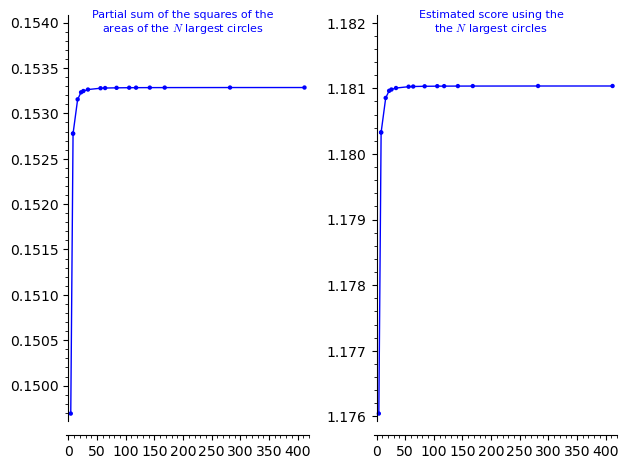

In [4]:
psums = [partial_sum_area_squared(c) for c in [5,8,11,15,20,25,30,40,50,60,70,80,90,100,150,200]]
pscores = [(n,1/(1-s)) for (n,s) in psums]
p = graphics_array([
    points(psums) + line(psums)
    + text("Partial sum of the squares of the\nareas of the $N$ largest circles", (200,0.154), fontsize=8),
    points(pscores) + line(pscores)
    + text("Estimated score using the\nthe $N$ largest circles", (200,1.182), fontsize=8)
])
p.save("idea-20251127-figure-2.png")
p

Code for figure 1
-----------------

In [5]:
colors = ['black','blue','gray','red','green']

def draw_gasket(x,y,r,min_r,level):
    g = circle((x,y),r,alpha=0.7^level,axes=false,
               color=colors[mod(level,len(colors))])
    if r/2 < min_r:
        return g
    g += draw_gasket(x+r/2,y,r/2,min_r,level+1)
    g += draw_gasket(x-r/2,y,r/2,min_r,level+1)
    if r/3 < min_r:
        return g
    g += draw_gasket(x,y-2*r/3,r/3,min_r,level+1)
    g += draw_gasket(x,y+2*r/3,r/3,min_r,level+1)
    queue = [(((x+r/2,y),r/2),((x,y-2*r/3),r/3)),
             (((x+r/2,y),r/2),((x,y+2*r/3),r/3)),
             (((x-r/2,y),r/2),((x,y-2*r/3),r/3)),
             (((x-r/2,y),r/2),((x,y+2*r/3),r/3)),
             (((x+r/2,y),r/2),((x-r/2,y),r/2),((x,y+2*r/3),r/3)),
             (((x+r/2,y),r/2),((x-r/2,y),r/2),((x,y-2*r/3),r/3))]
    while len(queue) > 0:
        circles = queue[0]
        del queue[0]
        if len(circles) == 2:
            r1 = -r
            x1 = x
            y1 = y
            (((x2,y2),r2),((x3,y3),r3)) = circles
        elif len(circles) == 3:
            (((x1,y1),r1),((x2,y2),r2),((x3,y3),r3)) = circles
        c1 = 1/r1
        c2 = 1/r2
        c3 = 1/r3
        for c4 in [c1 + c2 + c3 - 2*sqrt(c1*c2 + (c1 + c2)*c3),
                   c1 + c2 + c3 + 2*sqrt(c1*c2 + (c1 + c2)*c3)]:
            r4 = 1/c4
            if r4 > min_r and c4 > max(c1,c2,c3):
                theta12 = atan2(y2-y1,x2-x1)
                theta13 = atan2(y3-y1,x3-x1)
                if theta12 > theta13:
                    if theta12 - theta13 < pi:
                        theta_low = theta13
                        theta_high = theta12
                    else:
                        theta_low = theta12
                        theta_high = theta13 + 2*pi
                else:
                    if theta13 - theta12 < pi:
                        theta_low = theta12
                        theta_high = theta13
                    else:
                        theta_low = theta13
                        theta_high = theta12 + 2*pi
                if len(circles) == 2:
                    theta_low += pi
                    theta_high += pi
                theta = var('theta')
                theta1a = find_root((x1+(r1+r4)*cos(theta) - x2)^2 + (y1+(r1+r4)*sin(theta) - y2)^2 - (r2+r4)^2, theta_low, theta_high)
                theta1b = find_root((x1+(r1+r4)*cos(theta) - x3)^2 + (y1+(r1+r4)*sin(theta) - y3)^2 - (r3+r4)^2, theta_low, theta_high)
                x4a = x1+(r1+r4)*cos(theta1a)
                y4a = y1+(r1+r4)*sin(theta1a)
                x4b = x1+(r1+r4)*cos(theta1b)
                y4b = y1+(r1+r4)*sin(theta1b)
                found = False
                if (x4a-x4b)^2 + (y4a-y4b)^2 < 0.1*min_r:
                    x4 = x4a
                    y4 = y4a
                    found = True
                if found:
                    g += draw_gasket(x4,y4,r4,min_r,level+1)
                    if len(circles) == 2:
                        queue.append((((x2,y2),r2),((x4,y4),r4)))
                        queue.append((((x3,y3),r3),((x4,y4),r4)))
                    elif len(circles) == 3:
                        queue.append((((x1,y1),r1),((x2,y2),r2),((x4,y4),r4)))
                        queue.append((((x1,y1),r1),((x3,y3),r3),((x4,y4),r4)))
                    queue.append((((x2,y2),r2),((x3,y3),r3),((x4,y4),r4)))
                else:
                    g += circle((x4a,y4a),r4,color='red')
                    g += circle((x4b,y4b),r4,color='black')
    return g

#### Figure 1

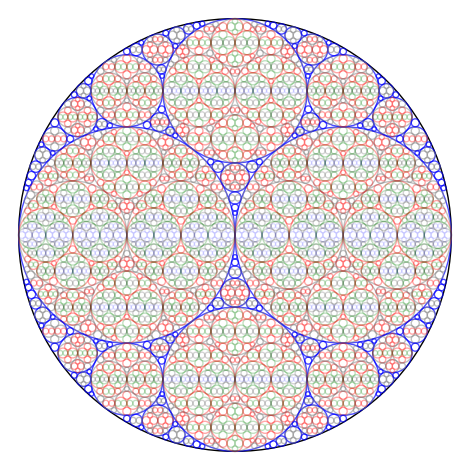

In [6]:
p = draw_gasket(0,0,1,0.01,0)
p.save("idea-20251127-figure-1.png")
p